In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
pd.set_option('display.max_columns', 65)

In [172]:
sber_data = pd.read_csv('data/sber_data.csv')
display(sber_data.head())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,oil_chemistry_raion,railroad_terminal_raion,nuclear_reactor_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_1line,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,no,no,no,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,no,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,no,no,no,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,no,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,no,no,no,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,no,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,no,no,no,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,no,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,no,yes,no,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,no,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [173]:
sber_data.shape[0]

30471

In [174]:
sber_data['sub_area'].nunique()

146

In [175]:
sber_data['price_doc'].max()

111111112

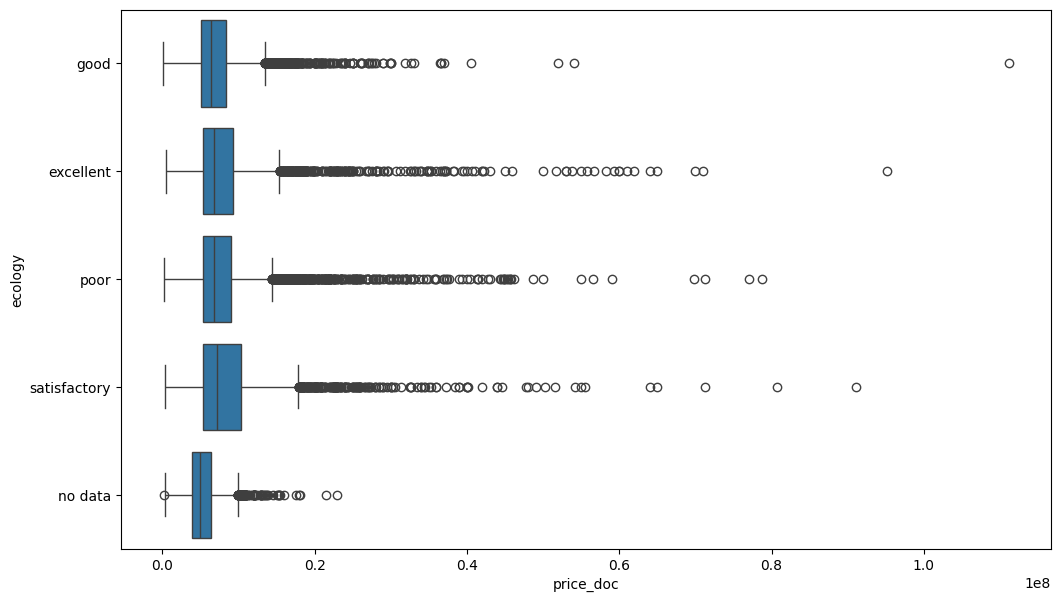

In [176]:
fig = plt.figure(figsize=(12, 7))
sns.boxplot(
    data=sber_data,
    x='price_doc',
    y='ecology'
);

In [177]:
# Количество пропусков.
null_series = sber_data.isnull().sum()
null_series[null_series.values > 0].sort_values(ascending=False)

hospital_beds_raion          14441
preschool_quota               6688
school_quota                  6685
life_sq                       6383
floor                          167
metro_min_walk                  25
metro_km_walk                   25
railroad_station_walk_km        25
railroad_station_walk_min       25
dtype: int64

In [178]:
# Процент пропусков.
null_series_perc = sber_data.isnull().mean() * 100
null_series_perc[null_series_perc.values > 0].sort_values(ascending=False)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

In [179]:
col_null_series_perc = null_series_perc[null_series_perc.values > 0].sort_values(ascending=False)

<Axes: >

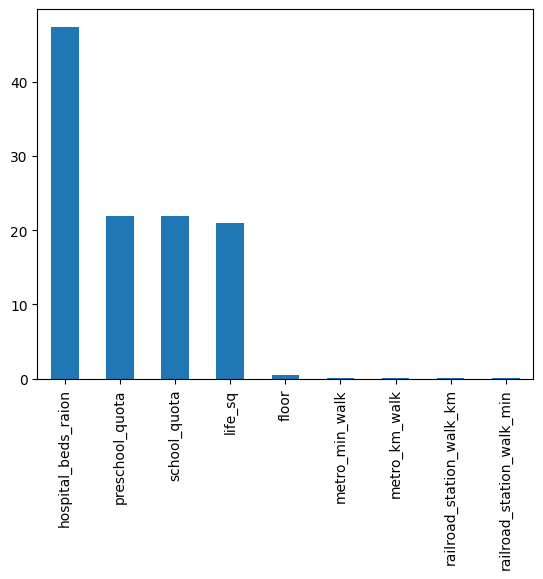

In [180]:
col_null_series_perc.plot(
    kind='bar',   
)

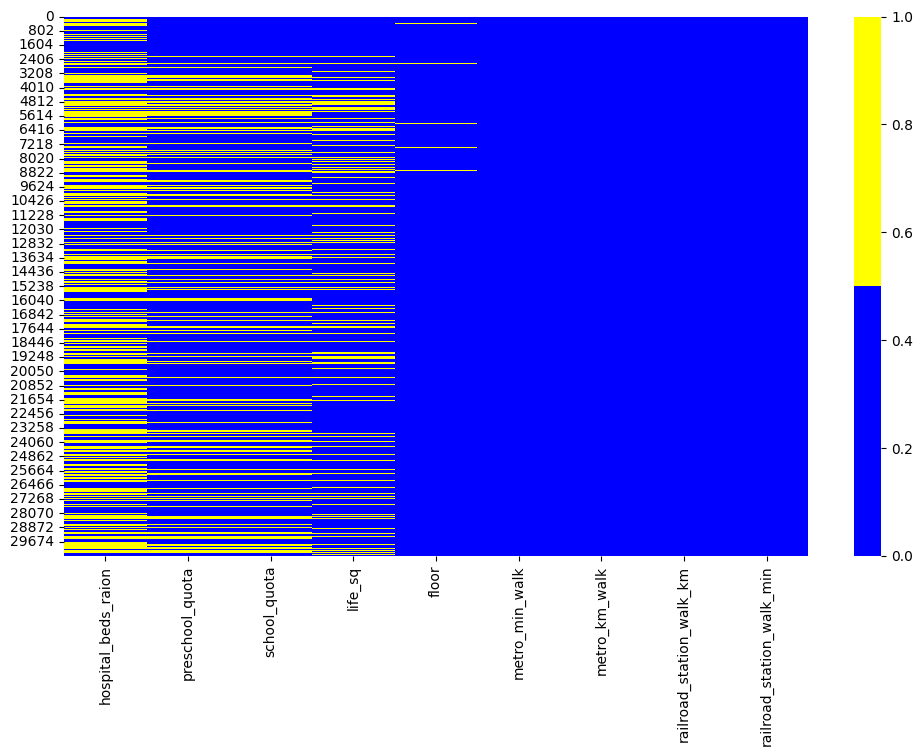

In [181]:
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(12, 7))
cols = col_null_series_perc.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
)

In [182]:
# Создаем копию таблицы.
drop_df = sber_data.copy()

In [183]:
# Вычисляем минимальный порог от числа строк.
thresh = drop_df.shape[0] * .7
# Удаляем столбцы, пропусков в которых более 30%.
drop_df = drop_df.dropna(thresh=thresh, axis=1)
# Удаляем записи, в которых более 1 пропуска.
drop_df = drop_df.dropna(how='any', axis=0)
drop_df.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [184]:
drop_df.shape

(20888, 60)

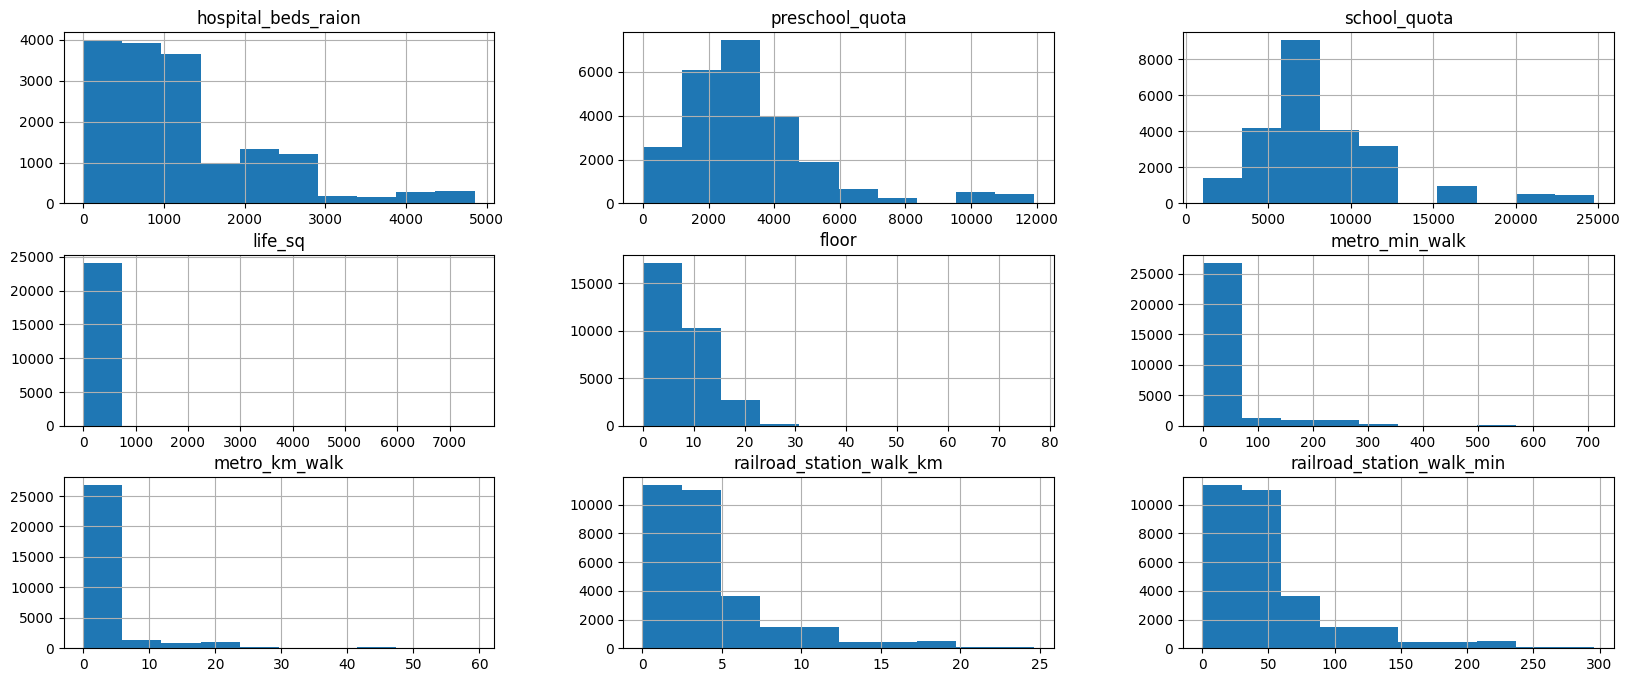

In [185]:
sber_data[cols].hist(figsize=(20, 8));

In [186]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

In [187]:
sber_data['id'].nunique() == sber_data.shape[0]

True

In [188]:
dub_sber = sber_data.copy()
db = dub_sber[dub_sber.drop('id', axis=1).duplicated()]

In [189]:
db

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,oil_chemistry_raion,railroad_terminal_raion,nuclear_reactor_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_1line,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
257,258,44,20.0,8.0,Pechatniki,2936.0,5,5791.0,5,0,730.0,0,0,4,5,0,2,8,no,no,no,0.806276,0.301075,3.612903,0.301075,0.239125,0.422633,1.162936,0.400846,0.663819,1.900560,22.806722,0.042388,0.508662,6.306532,3.555939,7.140921,8.343813,9.255590,no,5.422879,1.906351,0.940190,2.872488,3.338632,4.283646,2.543412,0.809661,0.715792,2.689025,0.150752,0.882085,1.186001,0.422633,2.291423,0.686464,7.067698,3.776489,excellent,0,6200000
443,444,44,27.0,1.0,Severnoe Medvedkovo,3916.0,4,7595.0,4,0,NaN,1,0,6,0,0,0,3,no,no,no,1.687294,0.887498,10.649976,0.887498,0.220633,0.291782,1.209948,0.172279,0.475210,5.015235,60.182826,0.107559,1.290702,0.964325,10.418293,12.778876,13.477537,14.902437,no,3.809844,3.875690,0.431265,3.672634,3.034252,4.539566,0.511731,2.679895,5.210266,0.409883,1.821046,0.732302,1.746865,0.291782,0.936937,0.463655,7.252920,7.352771,good,0,6000000
472,473,22,14.0,9.0,Dmitrovskoe,1208.0,4,5671.0,4,0,1130.0,1,0,6,2,0,5,1,no,no,yes,3.841759,2.651999,28.383297,2.365275,0.124055,0.157564,0.422875,0.022594,0.122411,2.740230,32.882757,0.076897,0.922758,2.365687,10.279505,12.870054,13.502762,14.964471,no,13.509010,1.160629,0.208406,1.107467,7.667542,7.551629,1.042768,1.085356,1.892693,1.309836,0.848344,0.903281,0.646299,0.157564,1.597722,1.259593,16.747885,8.065839,poor,0,3500000
599,600,37,22.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,NaN,1,0,8,4,0,2,4,no,no,no,1.093283,0.333817,4.005810,0.333817,0.148035,0.055978,2.008894,0.291748,0.285844,3.536778,42.441341,0.047666,0.571996,5.525529,5.049752,7.040166,7.783333,9.568890,no,22.183108,5.791239,1.383503,2.282859,4.702016,2.914302,0.647620,0.723962,4.242164,1.837541,0.549116,0.594123,0.473285,0.055978,1.479723,0.724203,5.340694,5.006628,poor,0,6000000
788,789,37,22.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,NaN,1,0,8,4,0,2,4,no,no,no,1.093283,0.333817,4.005810,0.333817,0.148035,0.055978,2.008894,0.291748,0.285844,3.536778,42.441341,0.047666,0.571996,5.525529,5.049752,7.040166,7.783333,9.568890,no,22.183108,5.791239,1.383503,2.282859,4.702016,2.914302,0.647620,0.723962,4.242164,1.837541,0.549116,0.594123,0.473285,0.055978,1.479723,0.724203,5.340694,5.006628,poor,0,6000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30319,30322,39,NaN,6.0,Solncevo,3953.0,5,9700.0,5,0,750.0,2,0,4,3,0,5,1,no,no,no,3.343157,2.037572,24.450869,2.037572,0.230087,0.044599,0.625673,0.360319,0.631064,2.293593,27.523117,0.257288,3.087455,2.117385,12.213834,14.929607,16.101361,16.957155,no,10.507131,1.320121,0.564069,2.128289,5.574742,9.073621,3.945655,2.435399,6.335965,6.167764,0.638041,1.052999,0.509985,0.044599,3.407720,2.002973,8.634607,4.896656,good,0,4620233
30322,30325,62,NaN,9.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,NaN,0,0,0,0,0,1,0,no,no,no,2.152792,1.722233,20.666800,1.722233,0.897889,1.234235,4.566595,0.427248,0.353642,3.73

In [190]:
dupl_columns = list(sber_data.columns)
# dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 0
